# Problem 2

In order to run this notebook ```tensorflow_probability``` was installed through ```pip``` in a ```venv```. This will  be the only extra module we'll need to install.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp

We can now define the two Gaussian distributions we'll be mixing in our Metropolis algorithm through ```tfd.MixtureSameFamily```; an explanation of this function can be found [here](https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/MixtureSameFamily). The parameters of the Gaussian distributions are its inputs:

In [2]:
tfd = tfp.distributions
# First Gaussian distribution parameters
A1 = 1.0
center1 = 0.0
prob1 = 0.3
# Second Gaussian distribution parameters
A2 = 1.75
center2 = 6.0
prob2 = 0.7

g = tfd.MixtureSameFamily( mixture_distribution=tfd.Categorical( probs=[prob1, prob2]),
                          components_distribution=tfd.Normal(
                          loc=[center1, center2], scale=[A1, A2]))

gvalsi = []
gxvals = np.linspace(-10,10,100)
for x in gxvals:
    gvalsi.append( g.prob(x) )   # Need to use .prob in order to plot
gvals = np.array(gvalsi)

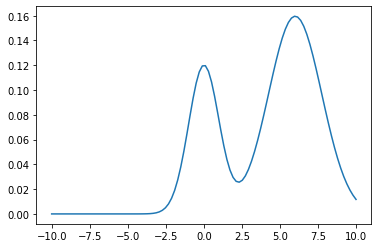

In [3]:
plt.plot(gxvals, gvals)
plt.show()

The two peaks produced match those given in the original Metropolis notebook, though the widths are different. The probalilites of the distributions are also not taken to be equal, and the overlap between them seems to interfere constructively. Compared to the numpy implementation, our work here is less complicated since it requires no extra Python files nor SWIG.

Lastly, we now run the actual Metroplolis MCMC. To do this, we make use of the functions ```tfp.mcmc.sample_chain``` and ```tfp.mcmc.RandomWalkMetropolis``` defined in [this page](https://www.tensorflow.org/probability/api_docs/python/tfp/mcmc/RandomWalkMetropolis) along with some initial conditions from the original notebook:

In [4]:
x0 = 0.0
nskip = 1000

samples = tfp.mcmc.sample_chain(
  num_results=nskip,
  current_state=x0,
  kernel=tfp.mcmc.RandomWalkMetropolis(g.log_prob),
  num_burnin_steps=500,
  trace_fn=None,
  seed=42)

samples = np.array(samples)   # Must convert to an array

sample_mean = tf.math.reduce_mean(samples, axis=0)
sample_std = tf.sqrt(
    tf.math.reduce_mean(
        tf.math.squared_difference(samples, sample_mean),
        axis=0))

print('Estimated mean: {}'.format(sample_mean))
print('Estimated standard deviation: {}'.format(sample_std))

Estimated mean: 5.210634708404541
Estimated standard deviation: 2.612039804458618


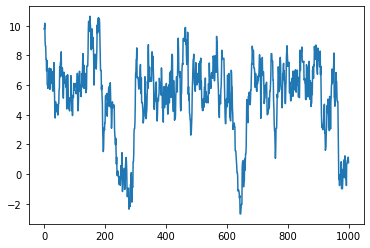

In [5]:
plt.plot(samples)
plt.show()

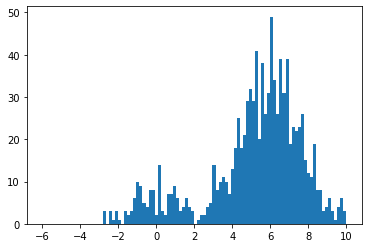

In [6]:
res = plt.hist( samples, bins=100, range=(-6,10) )
plt.show()

As we can see, the generated random walk plot is biased in one direction due to the double distribution sampling. Lastly, the histogram above closely matches its analytical version, thus demonstrating the success of this model.